What is Pandas ?
pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

In [20]:
import pandas as pd
print(pd.__version__)

2.2.2


1. Read data (Đọc dữ liệu từ file, hiểu cấu trúc của dataframe)
2. Exact data (Trích xuất dữ liệu, trích chọn dữ liệu)
3. Draw graph (Vẽ đồ thị dữ liệu)
4. Transform data type (Chuyển đổi dữ liệu, xử lý dữ liệu)

In [21]:
import pandas as pd
# 1. Đọc dữ liệu từ file  
df = pd.read_csv('input/bank-full.csv')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [22]:
#2. check data is null
print(df.shape)
df.isna().sum()

(45211, 17)


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [23]:
# delete na rows
print(df.shape)
df.isna().sum()

df = df.dropna()
print(df.isna().sum())
print(df.shape)

(45211, 17)
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
(45211, 17)


In [24]:
# tên cột
names = df.columns.values.tolist()
print(len(names))
print(names)
types = df.dtypes
print(types)


17
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [25]:
#lấy thông tin theo cột

# lấy 1 ô 
# val = df['col_name'].values[0]
x = df['age'][2]
print(x)
# lấy cả cột
col = list(df['age'])
print(len(col))
print(col[:10])
# lấy nhiều cột theo khoảng
cols = df.loc[1:3,['age','job']]
print(cols)
# lấy nhiều cột theo điều kiện
cols = df.loc[df['age']>50,['age','job']]
print(cols)

33
45211
[58, 44, 33, 47, 33, 35, 28, 42, 58, 43]
   age           job
1   44    technician
2   33  entrepreneur
3   47   blue-collar
       age          job
0       58   management
8       58      retired
12      53   technician
13      58   technician
14      57     services
...    ...          ...
45204   73      retired
45206   51   technician
45207   71      retired
45208   72      retired
45209   57  blue-collar

[9255 rows x 2 columns]


In [26]:
# lấy cả dòng 
# loc gets rows (or columns) with particular labels from the index.
# iloc gets rows (or columns) at particular positions in the index (so it only takes integers).
row = list(df.iloc[0])
print(row)
rows = list(df.iloc[0:2])
print(rows)

[58, 'management', 'married', 'tertiary', 'no', 2143, 'yes', 'no', 'unknown', 5, 'may', 261, 1, -1, 0, 'unknown', 'no']
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [27]:
# lấy toàn bộ dữ liệu
# chuyển về dạng numpy 
data = df.values
print(data.shape)
print(data[0])

(45211, 17)
[58 'management' 'married' 'tertiary' 'no' 2143 'yes' 'no' 'unknown' 5
 'may' 261 1 -1 0 'unknown' 'no']


In [28]:
# lấy dữ liệu theo điều kiện 
d = df.loc[df['age']==53]
print(d.shape)
print(d.head().T)

(891, 17)
                  12          37          61          75           101
age                53          53          53          53           53
job        technician  technician  technician  technician  blue-collar
marital       married     married    divorced     married      married
education   secondary   secondary   secondary   secondary      primary
default            no          no          no          no           no
balance             6          -3         989         384           90
housing           yes          no         yes         yes           no
loan               no          no          no          no           no
contact       unknown     unknown     unknown     unknown      unknown
day                 5           5           5           5            5
month             may         may         may         may          may
duration          517        1666         812         176          124
campaign            1           1           1           1          

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


<Axes: xlabel='marital'>

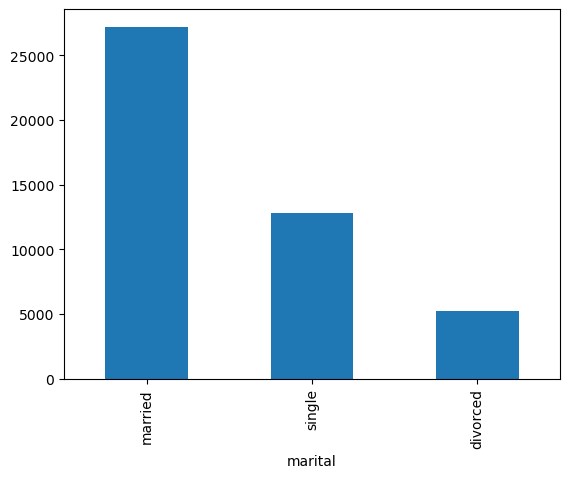

In [29]:
#3. vẽ
# - đếm frequency trước khi vẽ 
f = df['marital'].value_counts()
print(f)
f.plot.bar()

In [30]:
f = df['deposit'].value_counts()
print(f)
f.plot.bar()

KeyError: 'deposit'

secondary    5470
tertiary     3684
primary      1499
unknown       497
Name: education, dtype: int64


<AxesSubplot:>

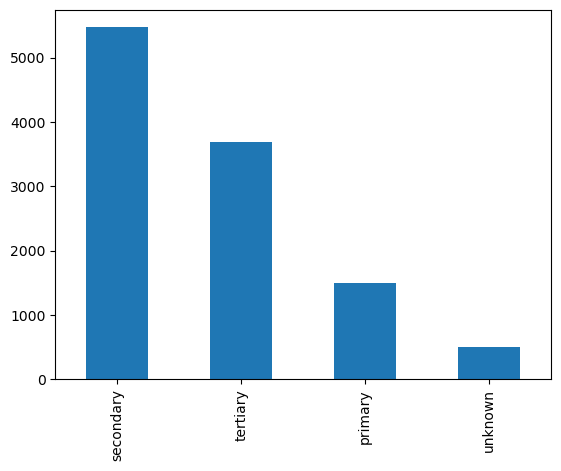

In [33]:
f = df['education'].value_counts()
print(f)
f.plot.bar()

<AxesSubplot:xlabel='education', ylabel='job'>

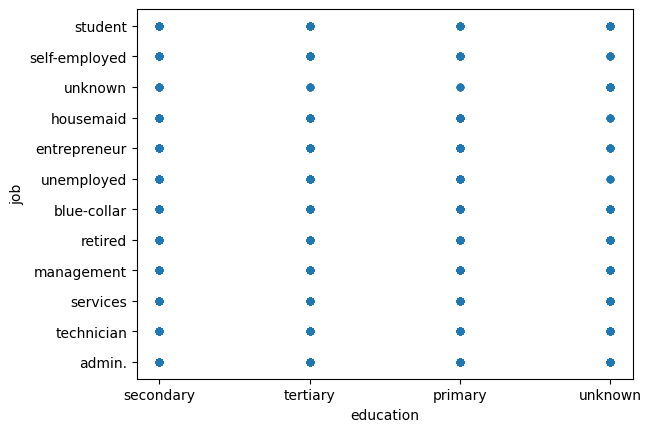

In [34]:
# quan hệ giữa các attribute
df.plot.scatter(x='education',y='job')

<AxesSubplot:xlabel='species'>

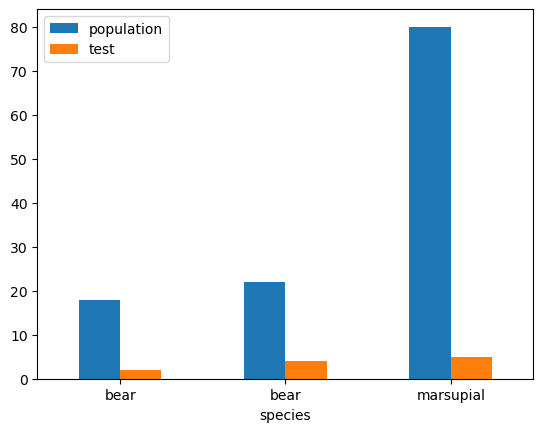

In [25]:
# 3. vẽ đồ thị 
# trục hoành là 1 cột, trục tung là các cột giá trị số còn lại  
df1 = pd.DataFrame({'species': ['bear', 'bear', 'marsupial'],
                  'population': [18, 22, 80],
                    'abc': ['a', 'b', 'c'],
                   'test':[2,4,5]},
                  index=['panda', 'polar', 'koala'])
#print(df1)
df1.plot.bar(x='species', rot=0)

<AxesSubplot:xlabel='species'>

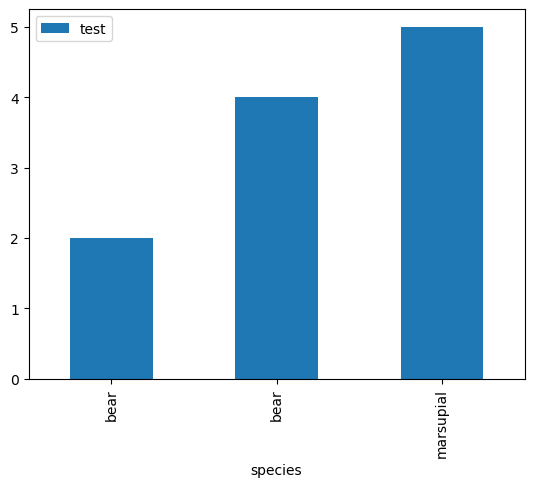

In [26]:
# 3. vẽ đồ thị 
# - xác định 2 trục trước khi vẽ, trong đó y là trục numeric 
df1 = pd.DataFrame({'species': ['bear', 'bear', 'marsupial'],
                  'population': [18, 22, 80],
                    'abc': ['a', 'b', 'c'],
                   'test':[2,4,5]},
                  index=['panda', 'polar', 'koala'])
#print(df1)
df1.plot.bar(x='species',y='test')

<AxesSubplot:>

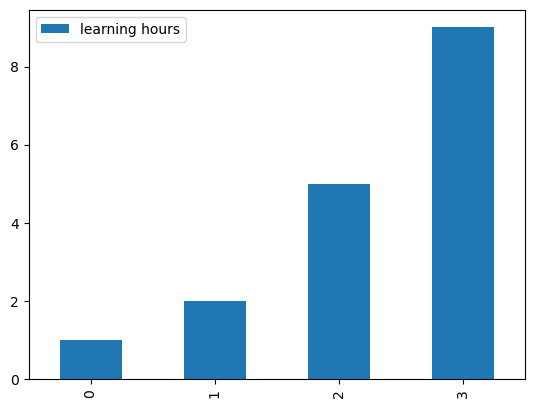

In [36]:
df3 = pd.DataFrame({'learning hours': [1, 2, 5, 9],
                  'ranking': ['d', 'c', 'b', 'a']})
df3.plot.bar()

<AxesSubplot:xlabel='ranking', ylabel='learning hours'>

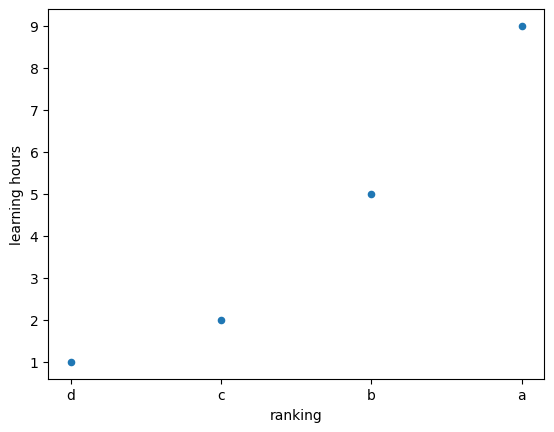

In [37]:
df3.plot.scatter(x='ranking',y='learning hours')

In [156]:
# 4. Chuyển đổi dữ liệu 
from sklearn.preprocessing import LabelEncoder

df3 = pd.DataFrame({'learning hours': [1, 8, 2, 3, 5, 9],
                  'ranking': ['d', 'a','c', 'b','b', 'a']})
LE = LabelEncoder()
df3['code'] = LE.fit_transform(df3['ranking'])
print(df3)
print(df3['code'])

   learning hours ranking  code
0               1       d     3
1               8       a     0
2               2       c     2
3               3       b     1
4               5       b     1
5               9       a     0


In [166]:
a = pd.factorize(df3['ranking']) 
print(a)
print(a[0])
print(list(a[0]))
df3['code1']=list(a[0])
print(df3)
# lấy danh sách indexing 
print(list(a[1]))

(array([0, 1, 2, 3, 3, 1]), Index(['d', 'a', 'c', 'b'], dtype='object'))
[0 1 2 3 3 1]
[0, 1, 2, 3, 3, 1]
   learning hours ranking  code  code1
0               1       d     3      0
1               8       a     0      1
2               2       c     2      2
3               3       b     1      3
4               5       b     1      3
5               9       a     0      1
['d', 'a', 'c', 'b']


In [169]:
# pandas dummies 
a = pd.get_dummies(df3['ranking'])
print(a)
frames = [df3,a]
result = pd.concat(frames,axis=1)
print(result)

   a  b  c  d
0  0  0  0  1
1  1  0  0  0
2  0  0  1  0
3  0  1  0  0
4  0  1  0  0
5  1  0  0  0
   learning hours ranking  code  code1  a  b  c  d
0               1       d     3      0  0  0  0  1
1               8       a     0      1  1  0  0  0
2               2       c     2      2  0  0  1  0
3               3       b     1      3  0  1  0  0
4               5       b     1      3  0  1  0  0
5               9       a     0      1  1  0  0  0
